In [150]:
from classes_V3 import *

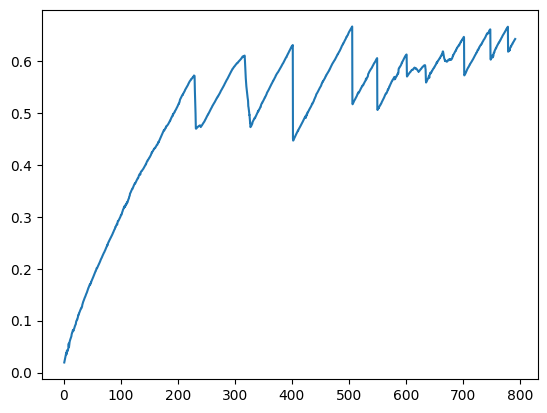

In [151]:
s = pd.read_csv('5.data', delimiter='   ', engine='python', skiprows=13, header=None)
fig, ax = plt.subplots()
ax.plot(s[0], s[1])

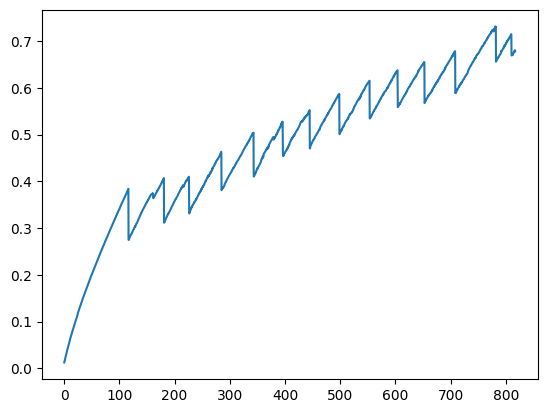

In [152]:
s = pd.read_csv('6.data', delimiter='   ', engine='python', skiprows=13, header=None)
fig, ax = plt.subplots()
ax.plot(s[0], s[1])

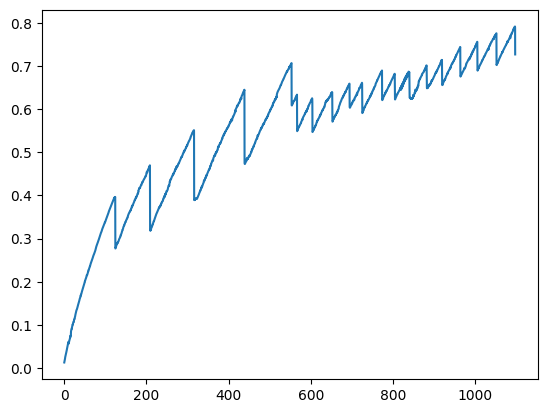

In [153]:
s = pd.read_csv('7.data', delimiter='   ', engine='python', skiprows=13, header=None)
fig, ax = plt.subplots()
ax.plot(s[0], s[1])

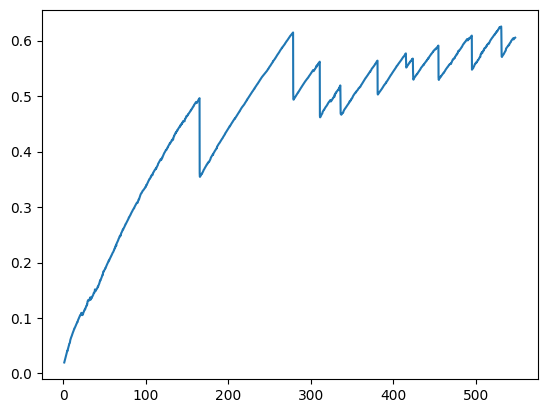

In [154]:
s = pd.read_csv('10.data', delimiter='   ', engine='python', skiprows=13, header=None)
fig, ax = plt.subplots()
ax.plot(s[0], s[1])

In [ ]:
class ThresholdSwitch():
    def __init__(self,  R_off: float = 10_000_000_000, R_on: float = 10_000, V_th: float = 0.3, V_hold: float = 0.05) -> None:
        self.R_off = R_off
        self.R_on = R_on
        self.V_th =V_th
        self.V_hold =V_hold
        self.state = 'off'

    def get_resistance(self, voltage: float):
        if (self.state == 'off') and ((voltage) < self.V_th):
            return self.R_off
        elif (self.state == 'off') and ((voltage) > self.V_th):
            self.state = 'on'
            return self.R_on
        elif (self.state == 'on') and ((voltage) > self.V_hold):
            return self.R_on
        elif (self.state == 'on') and ((voltage) < self.V_hold):
            self.state = 'off'
            return self.R_off

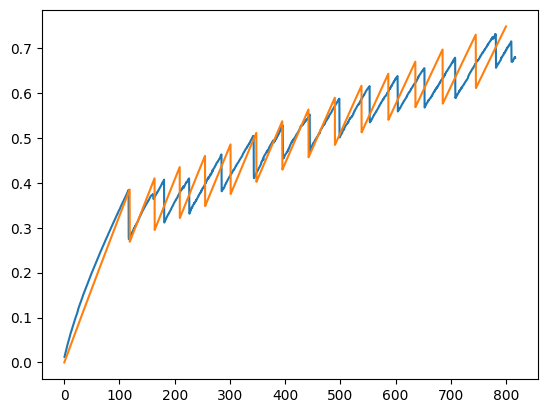

In [ ]:
t = np.linspace(0, 800, 10000)
dt = t[1] - t[0]
I_inj = 1e-7
V_0 = [0.12]
ts = ThresholdSwitch(V_hold=0.1, V_th=0.2, R_off=1e10, R_on=10000)
R_m = [ts.get_resistance(0)]
C_m = [3e-5]
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0[i]) / ts.get_resistance(V[i] - V_0[i])) * dt / C_m[i] + V[i])
    r.append(ts.get_resistance(V[i] - V_0[i]))
    C_m.append(C_m[i] + 1e-9 )
    V_0.append(V_0[i] + 0.000044)

s = pd.read_csv('6.data', delimiter='   ', engine='python', skiprows=13, header=None)

fig, ax = plt.subplots()
ax.plot(s[0], s[1])
ax.plot(t, V)
#ax.plot(t, np.sin(0.01*t))

In [333]:
t = np.linspace(0, 600, 10000)
dt = t[1] - t[0]
I_inj = 5e-8
V_0 = [0.12]
ts = ThresholdSwitch(V_hold=0.05, V_th=0.2, R_off=1e10, R_on=10000)
R_m = [ts.get_resistance(0)]
C_m = [1.37e-5]
V = [0]
r = [ts.get_resistance(0)]
for i in range(len(t)-1):
    V.append((I_inj - (V[i] - V_0[i]) / ts.get_resistance(V[i] - V_0[i])) * dt / C_m[i] + V[i])
    r.append(ts.get_resistance(V[i] - V_0[i]))
    C_m.append(C_m[i] + 1.7e-9 )
    V_0.append(V_0[i] + 0.000044)


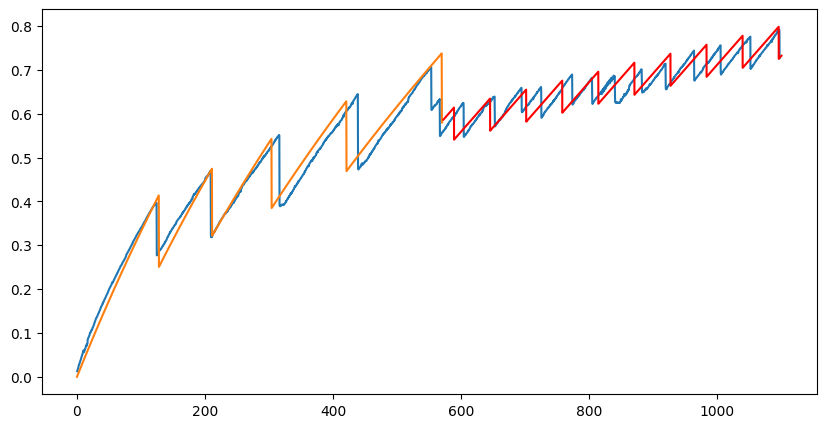

In [354]:

t_2 = np.linspace(0, 1100, 10000)
dt_2 = t_2[1] - t_2[0]
I_inj = 5e-8
V_0_2 = [0.2]
ts_2 = ThresholdSwitch(V_hold=0.16, V_th=0.2, R_off=1e10, R_on=10000)
R_m_2 = [ts_2.get_resistance(0)]
C_m_2 = [3e-5]
V_2 = [0]
r_2 = [ts_2.get_resistance(0)]
for i in range(len(t)-1):
    V_2.append((I_inj - (V_2[i] - V_0_2[i]) / ts_2.get_resistance(V_2[i] - V_0_2[i])) * dt_2 / C_m_2[i] + V_2[i])
    r_2.append(ts_2.get_resistance(V_2[i] - V_0_2[i]))
    C_m_2.append(C_m_2[i]  )
    V_0_2.append(V_0_2[i] + 0.00004)

s = pd.read_csv('7.data', delimiter='   ', engine='python', skiprows=13, header=None)
fig, ax = plt.subplots(figsize = [10,5])
ax.plot(s[0], s[1])
ax.plot(t[:-500], V[:-500])
ax.plot(t_2[5200:], V_2[5200:], color = 'r')